In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Weibull_2P
from lifelines import KaplanMeierFitter

In [2]:
# Ore până la defectare pentru 12 componente
failures = [120, 150, 200, 230, 250, 300, 320, 400, 420, 500, 550, 600]

# Le punem într-un DataFrame
df = pd.DataFrame(failures, columns=["Timp_defectare"])
print(df.head())

   Timp_defectare
0             120
1             150
2             200
3             230
4             250


Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 12/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         381.206         47.8829   298.017   487.616
     Beta         2.42658        0.557307   1.54704   3.80617 

Goodness of fit    Value
 Log-likelihood -76.7321
           AICc  158.798
            BIC  158.434
             AD  1.20686 

Scale (eta): 381.2061035151269
Shape (beta): 2.4265825753582324


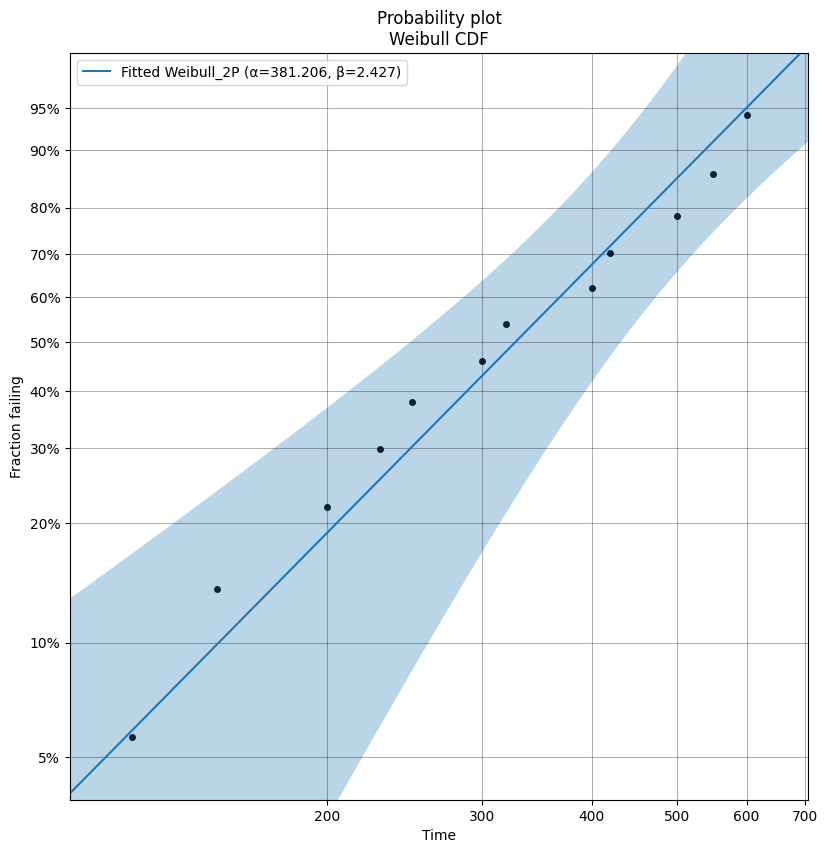

In [3]:
# Fit Weibull 2-parametri
fit = Fit_Weibull_2P(failures=failures, show_probability_plot=True)

# Accesare parametri prin atribute
eta = fit.alpha  # scale parameter (uneori notat eta)
beta = fit.beta  # shape parameter

print("Scale (eta):", eta)
print("Shape (beta):", beta)

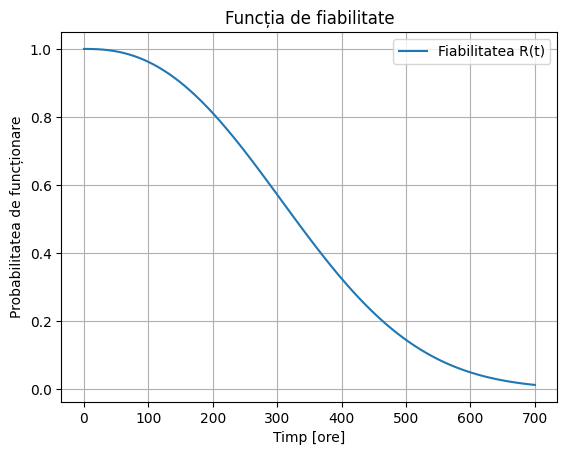

In [4]:
# Funcția de fiabilitate la momente de timp
t = np.linspace(0, 700, 100)
R_t = np.exp(-(t/fit.alpha)**fit.beta)   # funcția R(t)

plt.plot(t, R_t, label="Fiabilitatea R(t)")
plt.xlabel("Timp [ore]")
plt.ylabel("Probabilitatea de funcționare")
plt.title("Funcția de fiabilitate")
plt.legend()
plt.grid()
plt.show()

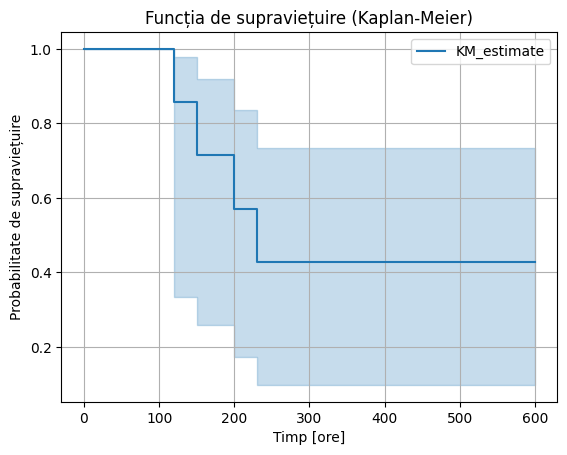

In [5]:
# Exemplu: 1 = defectare, 0 = cenzurat (încă funcționează)
times = [120, 150, 200, 230, 400, 500, 600]
events = [1, 1, 1, 1, 0, 0, 0]  # ultimele 3 încă nu s-au defectat

kmf = KaplanMeierFitter()
kmf.fit(times, event_observed=events)

kmf.plot_survival_function()
plt.title("Funcția de supraviețuire (Kaplan-Meier)")
plt.xlabel("Timp [ore]")
plt.ylabel("Probabilitate de supraviețuire")
plt.grid()
plt.show()